Neural Network - FeedForward (FF) and BackPropagation (BP)

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# DATAset
<https://drive.google.com/file/d/1RjyrKHTOXgfztLP5JGAMoRehn69LYuZb/view?usp=sharing>

- Labels: 0 and 1 
    - where 0 is not at risk for heart disease
- Data is 4D


In [2]:
filename="StudentSummerProgramData_Numeric_2NumLabeled_2D.csv"
DF = pd.read_csv(filename)
print(DF)

    Decision   GPA  WorkExp  TestScore  WritingScore
0          0  3.90      6.7        962           100
1          0  3.80      1.4        969            97
2          0  3.80      2.3        970            98
3          0  3.60      0.9        969            97
4          0  3.92      1.2        969            95
..       ...   ...      ...        ...           ...
58         1  3.33      0.8        768            70
59         1  2.91      6.2        753            77
60         1  3.56      1.7        769            81
61         1  2.85      4.6        762            75
62         1  3.21      1.7        766            79

[63 rows x 5 columns]


Set y to the label. Check the shape!

In [3]:
y = np.array(DF.iloc[:,0]).T
y = np.array([y]).T
print("y is\n", y)

y is
 [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


## Normalize the data (not the label!)

or min/max
```
normalized_df=(df-df.min())/(df.max()-df.min())
```


In [4]:
DF=DF.iloc[:, [1, 2, 3]]
DF=(DF-DF.mean())/DF.std()
print(DF)

         GPA   WorkExp  TestScore
0   1.035997  2.535365   0.834600
1   0.756477 -0.371772   0.906768
2   0.756477  0.121893   0.917078
3   0.197438 -0.646030   0.906768
4   1.091901 -0.481476   0.906768
..       ...       ...        ...
58 -0.557264 -0.700882  -1.165494
59 -1.731246  2.261107  -1.320141
60  0.085631 -0.207217  -1.155185
61 -1.898958  1.383480  -1.227353
62 -0.892688 -0.207217  -1.186114

[63 rows x 3 columns]


In [5]:
X = np.array(DF)
print("X is\n", X)

X is
 [[ 1.03599692  2.53536477  0.83460008]
 [ 0.75647741 -0.37177224  0.90676843]
 [ 0.75647741  0.12189254  0.9170782 ]
 [ 0.19743838 -0.64603045  0.90676843]
 [ 1.09190082 -0.48147552  0.90676843]
 [ 0.75647741 -0.48147552  0.8861489 ]
 [ 0.98009302 -0.3169206   0.8861489 ]
 [ 0.4769579  -0.48147552  0.90676843]
 [ 1.03599692  1.43833194  0.82429031]
 [ 0.4769579  -0.37177224  0.87583914]
 [ 0.75647741 -0.20721731  0.89645867]
 [ 1.11985277 -0.70088209  0.90676843]
 [ 0.19743838 -0.48147552  0.8861489 ]
 [ 0.44900594  0.61555731  0.8861489 ]
 [ 0.4769579   0.88981552  0.90676843]
 [ 1.03599692  0.94466716  0.8861489 ]
 [ 0.70057351 -0.48147552  0.87583914]
 [ 0.4769579   0.3412991  -0.84589172]
 [-0.08208113 -0.75573373  0.86552937]
 [ 0.33719814 -0.20721731  0.84490984]
 [ 0.61671765 -0.53632716  0.90676843]
 [ 0.14153448 -0.70088209  0.90676843]
 [ 0.70057351  3.6323976   0.87583914]
 [ 1.09190082  0.39615075  0.8861489 ]
 [ 0.02972668 -0.75573373  0.86552937]
 [ 0.36515009  0.06

In [6]:
InputColumns = 3
NumberOfLabels = 2
n = len(DF) ## number of rows of entire X

Take the label off of X and make it a numpy array

## Creating one hot labels for y
```
temp = y
#print(temp)
one_hot_labels = np.zeros((n, NumberOfLabels))
print(one_hot_labels)
for i in range(n):
    one_hot_labels[i, temp[i]-1] = 1    
#print(one_hot_labels)
y = one_hot_labels
print(y)
```
# NN class object code

In [7]:
LR=.01
LRB = .01

In [8]:
class NeuralNetwork(object):
    def __init__(self):
        
        self.InputNumColumns = InputColumns  ## columns
        self.OutputSize = 1 ## Categories
        self.HiddenUnits = 2  ## one layer with h units
        self.n = n  ## number of training examples, n
        
        print("Initialize NN\n")
        #Random W1
        self.W1 = np.random.randn(self.InputNumColumns, self.HiddenUnits) # c by h  
       
        print("INIT W1 is\n", self.W1)
        
        ##-----------------------------------------
        ## NOTE ##
        ##
        ## The following are all random. However, you can comment this out
        ## and can set any weights and biases by hand , etc.
        ##
        ##---------------------------------------------
        
        self.W2 = np.random.randn(self.HiddenUnits, self.OutputSize) # h by o 
        print("W2 is:\n", self.W2)
        
        self.b = np.random.randn(1, self.HiddenUnits)
        print("The b's are:\n", self.b)
        ## biases for layer 1
        
        self.c = np.random.randn(1, self.OutputSize)
        print("The c is\n", self.c)
        ## bias for last layer
        
        
    def FeedForward(self, X):
        print("FeedForward\n\n")
        self.z = (np.dot(X, self.W1)) + self.b 
        #X is n by c   W1  is c by h -->  n by h
        print("Z1 is:\n", self.z)
        
        self.h = self.Sigmoid(self.z) #activation function    shape: n by h
        print("H is:\n", self.h)
        
        self.z2 = (np.dot(self.h, self.W2)) + self.c # n by h  @  h by o  -->  n by o  
        print("Z2 is:\n", self.z2)
        
        ## Using Softmax for the output activation
        output = self.Sigmoid(self.z2)  
        print("output Y^ is:\n", output)
        return output
        
    def Sigmoid(self, s, deriv=False):
        if (deriv == True):
            return s * (1 - s)
        return 1/(1 + np.exp(-s))
    
    # def Softmax(self, M):
    #     #print("M is\n", M)
    #     expM = np.exp(M)
    #     #print("expM is\n", expM)
    #     SM=expM/np.sum(expM, axis=1)[:,None]
    #     #print("SM is\n",SM )
    #     return SM 
    
    def BackProp(self, X, y, output):
        print("\n\nBackProp\n")
        self.LR = LR
        self.LRB=LRB  ## LR for biases
        
        # Y^ - Y
        self.output_error = output - y    
        print("Y^ - Y\n", self.output_error)
        
        ## NOTE TO READER........................
        ## Here - we DO NOT multiply by derivative of Sig for y^ b/c we are using 
        ## cross entropy and softmax for the loss and last activation
        # REMOVED # self.output_delta = self.output_error * self.Sigmoid(output, deriv=True) 
        ## So the above line is commented out...............
        
        self.output_delta = self.output_error 
          
        ##(Y^ - Y)(W2)
        self.D_Error_W2 = self.output_delta.dot(self.W2.T) #  D_Error times W2
        #print("W2 is\n", self.W2)
        #print(" D_Error times W2\n", self.D_Error_W2)
        
        ## (H)(1 - H) (Y^ - Y)(Y^)(1-Y^)(W2)
        ## We still use the Sigmoid on H
        
        self.H_D_Error_W2 = self.D_Error_W2 * self.Sigmoid(self.h, deriv=True) 
        
        ## Note that * will multiply respective values together in each matrix
        #print("Derivative sig H is:\n", self.Sigmoid(self.h, deriv=True))
        #print("self.H_D_Error_W2 is\n", self.H_D_Error_W2)
        
        ################------UPDATE weights and biases ------------------
        #print("Old W1: \n", self.W1)
        #print("Old W2 is:\n", self.W2)
        #print("X transpose is\n", X.T)
        
        ##  XT  (H)(1 - H) (Y^ - Y)(Y^)(1-Y^)(W2)
        self.X_H_D_Error_W2 = X.T.dot(self.H_D_Error_W2) ## this is dW1
        
        ## (H)T (Y^ - Y) - 
        self.h_output_delta = self.h.T.dot(self.output_delta) ## this is for dW2
        
        #print("the gradient :\n", self.X_H_D_Error_W2)
        #print("the gradient average:\n", self.X_H_D_Error_W2/self.n)
        
        print("Using sum gradient........\n")
        self.W1 = self.W1 - self.LR*(self.X_H_D_Error_W2) # c by h  adjusting first set (input -> hidden) weights
        self.W2 = self.W2 - self.LR*(self.h_output_delta) 
        
        
        print("The sum of the b update is\n", np.mean(self.H_D_Error_W2, axis=0))
        print("The b biases before the update are:\n", self.b)
        self.b = self.b  - self.LRB*np.mean(self.H_D_Error_W2, axis=0)
        #print("The H_D_Error_W2 is...\n", self.H_D_Error_W2)
        print("Updated bs are:\n", self.b)
        
        self.c = self.c - self.LR*np.mean(self.output_delta, axis=0)
        #print("Updated c's are:\n", self.c)
        
        print("The W1 is: \n", self.W1)
        print("The W1 gradient is: \n", self.X_H_D_Error_W2)
        #print("The W1 gradient average is: \n", self.X_H_D_Error_W2/self.n)
        print("The W2 gradient  is: \n", self.h_output_delta)
        #print("The W2 gradient average is: \n", self.h_output_delta/self.n)
        print("The biases b gradient is:\n",np.mean(self.H_D_Error_W2, axis=0 ))
        print("The bias c gradient is: \n", np.mean(self.output_delta, axis=0))
        ################################################################
        
    def TrainNetwork(self, X, y):
        output = self.FeedForward(X)
        print("Output in TNN\n", output)
        self.BackProp(X, y, output)
        return output

# Train Network

In [9]:
MyNN = NeuralNetwork()

TotalLoss=[]
AvgLoss=[]
Epochs=150

for i in range(Epochs): 
    print("\nRUN:\n ", i)
    output=MyNN.TrainNetwork(X, y)
   
    #print("The y is ...\n", y)
    print("The output is: \n", output)
    output=np.where(output > 0.5, 1, 0)
    print('Prediction y^ is', output)
    ## Using Categorical Cross Entropy...........
    #loss = np.mean(-y * np.log(output))  ## We need y to place the "1" in the right place
    loss=np.sum(np.square(output-y))
    avgLoss=np.mean(np.square(output-y))
    print("The current average loss is\n", loss)
    TotalLoss.append(loss)
    AvgLoss.append(avgLoss)
    
    ## OLD---------------------
    # OLD #print("Total Loss:", .5*(np.sum(np.square(output-y))))
    # OLD #TotalLoss.append( .5*(np.sum(np.square(output-y))))
    #print("Average Loss:", .5*(np.mean(np.square((output-y)))))
    #AvgLoss.append(.5*(np.mean(np.square((output-y)))))

Initialize NN

INIT W1 is
 [[-1.61232553 -0.26995608]
 [-1.9289718   0.80656842]
 [-0.65577121 -0.48699072]]
W2 is:
 [[-0.23641254]
 [-0.30752946]]
The b's are:
 [[0.3475388  0.64664499]]
The c is
 [[-1.76889716]]

RUN:
  0
FeedForward


Z1 is:
 [[-6.76077932e+00  2.00547399e+00]
 [-7.49643502e-01 -2.99018253e-01]
 [-1.70866978e+00  9.41354060e-02]
 [ 6.80745736e-01 -3.69310281e-01]
 [-1.07884070e+00 -4.78051047e-01]
 [-5.24507268e-01 -3.77459937e-01]
 [-1.20247023e+00 -3.05101524e-01]
 [-8.73525183e-02 -3.12043466e-01]
 [-4.63787308e+00  1.12566271e+00]
 [-2.78684516e-01 -2.08497981e-01]
 [-1.06030446e+00 -1.61272686e-01]
 [-7.00679260e-01 -6.62563255e-01]
 [ 3.76845621e-01 -2.26543954e-01]
 [-2.14490858e+00  5.90375897e-01]
 [-2.73253427e+00  7.93996588e-01]
 [-3.72617273e+00  6.97363728e-01]
 [-4.27611131e-01 -3.57347579e-01]
 [-5.25117497e-01  1.20510981e+00]
 [ 1.37008011e+00 -3.62252453e-01]
 [-3.50485561e-01 -2.29818981e-02]
 [-2.06883470e-01 -3.94014064e-01]
 [ 8.76688295e-01 -


The sum of the b update is
 [0.02571157 0.0263819 ]
The b biases before the update are:
 [[0.34562615 0.64528099]]
Updated bs are:
 [[0.34536904 0.64501717]]
The W1 is: 
 [[-1.86506356 -0.58474524]
 [-1.65072856  0.80413223]
 [-1.18305101 -1.11981762]]
The W1 gradient is: 
 [[ 1.44598168  1.64224983]
 [-1.98550014 -0.03051502]
 [ 3.04557526  3.55945372]]
The W2 gradient  is: 
 [[-2.78152372]
 [-2.66343827]]
The biases b gradient is:
 [0.02571157 0.0263819 ]
The bias c gradient is: 
 [0.04505661]
The output is: 
 [[0.35381592]
 [0.25866422]
 [0.25073019]
 [0.37981105]
 [0.22741836]
 [0.26595514]
 [0.23605375]
 [0.30671604]
 [0.29492017]
 [0.30347314]
 [0.25498138]
 [0.23132299]
 [0.366347  ]
 [0.28774716]
 [0.29166503]
 [0.26310889]
 [0.27506219]
 [0.56728215]
 [0.46119243]
 [0.3219863 ]
 [0.28713996]
 [0.39834937]
 [0.40074263]
 [0.23721501]
 [0.43703378]
 [0.29791026]
 [0.27348589]
 [0.47055366]
 [0.34327249]
 [0.36801688]
 [0.27238505]
 [0.24151796]
 [0.25649725]
 [0.26936018]
 [0.2

# Output and Vis   

In [10]:
print("Total Loss List:", TotalLoss) 

Total Loss List: [28, 28, 28, 28, 28, 28, 28, 28, 28, 26, 12, 9, 6, 5, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


[[34  1]
 [ 1 27]]


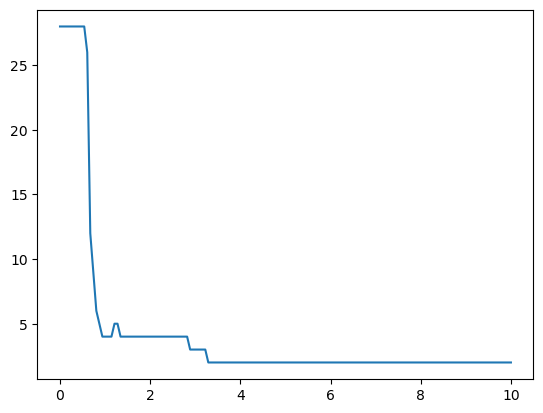

In [11]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, Epochs)
ax.plot(x, TotalLoss)    

print(confusion_matrix(output, y))

(JK Note: The following entire block of code was commented out in the original raw code, and it appears it's because it produces an error.)


In [12]:
# AvgLoss_ = np.mean(AvgLoss)
# print(AvgLoss_)
# fig2 = plt.figure()
# ax = plt.axes()
# x = np.linspace(0, 10, Epochs)
# ax.plot(x, AvgLoss_)  

# print(y)